# A expansão em série de Taylor
## ferramenta matemática para diferenciação e integração

A expansão em série de Taylor é comunmente usada em computação científica. Ela é usada para diferenciação, integração, interpolação e inclusive solução de equações diferenciais. A série não só é a base para o desenvolvimento de algorítmos senão que também permite estimar a precisão dos mesmos e prevê os erros associados a eles. 

Antes de estudar métodos para diferenciação e integração, vamos a revisar com ajuda do `Python` porque essa expansão é tão importante.

A série de Taylor é a expansão de uma função,  $f(x)$, num número infitino de termos da variável $x$, ou num número finito de termos mais um termo restante. Os coeficientes da expansão envolvem as derivadas sucesívas da função, já se espera que o restante tenda a $0$.

O concepto da série de Taylor foi formulado pelo matemático escocés James Gregory e introduzido formalmente pelo matemático inglés Brook Taylor em 1715. 

A expansão em série de Taylor da função $f(x)$ arredor do ponto $a$ é dada por

$$ f(x) = \sum_{n=0}^{\infty} \frac{(x-a)^n}{n!} f^{(n)}(a) = 
        f(a) + \frac{f'(a)}{1!}(x-a) +  \frac{f''(a)}{2!}(x-a)^2 + ...\;,
$$

onde $f^{(n)}(a)$ é a derivada n-essima da função, avaliada no ponto $a$ e $n!$ denota o fatorial de $n$.  

Quando $a=0$ a serie é também chamada série de Maclaurin.

A partir da fórmula acima podemos encontrar uma série para representar as funções $\sin(x)$ e $\cos(x)$, assim:

$$ \sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + ...  $$

e

$$ \cos(x) = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + ...  $$

Vamos a estudar em detalhe a expansão para o $\sin$ e comparar com o valor real:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

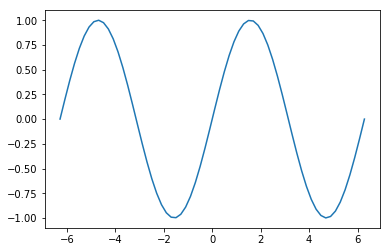

In [3]:
x = np.linspace(-2.*np.pi,2.*np.pi,64)
plt.plot(x,np.sin(x))

In [16]:
termo1 = x
termo2 = -x**3/math.factorial(3)
termo3 = x**5/math.factorial(5)
termo4 = -x**7/math.factorial(7)

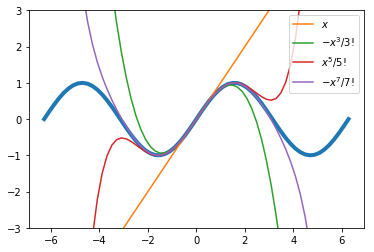

In [6]:
plt.plot(x,np.sin(x),lw=4)
plt.plot(x,termo1, label=r'$x$')
plt.plot(x,termo1+termo2,label=r'$-x^3/3!$')
plt.plot(x,termo1+termo2+termo3,label=r'$x^5/5!$')
plt.plot(x,termo1+termo2+termo3+termo4,label=r'$-x^7/7!$')
plt.ylim(-3,3)
plt.legend()

# Diferenciação numérica

### Diferencias finitas para atrás

Note que quantos mais termos da expansão considero, o valor de $f(x)$ é cada vez mais aproximado no ponto $x=0$.

Vamos considerar a serie de Taylor, avaliada nos pontos $x_m = x + \Delta x$, que correm ao longo do eixo $x$, unicamente com dois termos:

$$ f(x_m -  \Delta x) = f(x_m) - \frac{f'(x_m)}{1!} \Delta x + {\cal O}...\;, $$

onde $\Delta x$ é uma quantidade muito pequena.  O terceiro termo me indica que o erro ao estimar $f(x)$ é de primeira ordem, pois foi nesse ponto da expansão onde fizemos o truncamento da serie.  

Podemos estimar $f'(x_m)$, a partir dos valores de $f(x_m - \Delta x)$ e $f(x_m)$, assim:

$$ f'(x_m) = \frac{f(x_m) - f(x_m - \Delta x)}{\Delta x} + {\cal O} $$ 

Essa diferenciação se conhece como *backward* pois $x = x_m - \Delta x$,

O valor da derivada será mais próximo do valor real quanto maior o número de termos considerados na expansão e quanto menor o valor de $\Delta x$. 

In [192]:
# DIFERENCIAS FINITAS BACKWARD
#
n = 32
xm = np.linspace(-2.*np.pi,2.*np.pi,n)
# estimamos dx e tambem os valores de a
dx = xm[1]-xm[0]
# np.copy tem todos os valores de x, a eles adicionamos dx
x = np.copy(xm)-dx

# a funcao da qual queremos estimar a derivada
fxm= np.sin(xm)
# os termos da serie 
fx = np.sin(x)
dfxm_back = np.copy((fxm-fx)/dx)

Text(0.5,1,'diferencias finitas backwards')

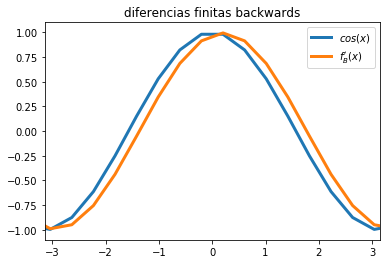

In [194]:
# graficamos a derivada, que para o caso é conhecida
# f'(x) = cos(x)
plt.plot(xm,np.cos(xm),lw=3, label=r'$cos(x)$')
# e agora a estimativa numérica 
plt.plot(xm,dfxm_back,lw=3, label=r'$f^{\prime}_B(x)$')
plt.legend()
plt.ylim(-1.1,1.1)
plt.xlim(-np.pi,np.pi)
plt.title('diferencias finitas backwards')

### Diferencias finitas para frente


Podemos avaliar a série em $x = x_m + \Delta x$, o que resulta em:

$$ f'(x_m) = \frac{f(x_m + \Delta x) - f(x_m)}{\Delta x} + {\cal O} $$, 

essa diferenciação se conhece como *forward*. O resultado é similar:


In [196]:
# DIFERENCIACAO FORWARD
#
xm = np.linspace(-2.*np.pi,2.*np.pi,n)
# estimamos dx e tambem os valores de a
dx = xm[1]-xm[0]
# np.copy tem todos os valores de x, a eles adicionamos dx
x = np.copy(xm)+dx

# a funcao da qual queremos estimar a derivada
fxm= np.sin(xm)
# os termos da serie 
fx = np.sin(x)

dfxm_for = np.copy((fx-fxm)/dx)

Text(0.5,1,'diferencias finitas forward')

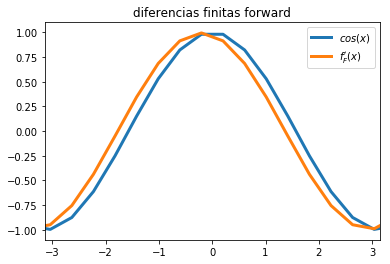

In [197]:
# graficamos a derivada, que para o caso é conhecida
# f'(x) = cos(x)
plt.plot(xm,np.cos(xm),lw=3, label=r'$cos(x)$')
# e agora a estimativa numérica 
plt.plot(xm,dfxm_for,lw=3, label=r'$f^{\prime}_F(x)$')
plt.legend()
plt.ylim(-1.1,1.1)
plt.xlim(-np.pi,np.pi)
plt.title('diferencias finitas forward')

Note que a derivada estimada não é o suficientemente acurada para valores de $n$ não muito grandes.  No caso da diferenciação *backward* a derivada esta um pouco atrás da solução real, e na diferenciação *forward* ela está um pouco à frente.   O seguinte exemplo nos permite ver que isso é problemático. Considere a função

$$ f(x) = a + bx^2 $$

Usando diferenciação *backward* 

\begin{eqnarray} 
f'(x) &=& \frac{a + b x^2 - [a + b (x - \Delta x)^2]}{\Delta x} \\
      &=& 2 b x - b \Delta x
\end{eqnarray}

Que é diferente por um fator $b \Delta x$ do valor exato da derivada $2 b x$. O que podemos fazer?  

### Diferencias finitas centradas

Uma posibilidade é combinar os métodos *backward* e *forward*, da seguinte forma:

\begin{eqnarray}
f(x_m + \Delta x)&=&f(x_m)+\frac{f'(x_m)}{1!} \Delta x+\frac{f''(x_m)}{2!} \Delta x^2 
                 +\frac{f'''(x_m)}{3!} \Delta x^3 + {\cal O}^4  \\ 
f(x_m - \Delta x)&=&f(x_m)-\frac{f'(x_m)}{1!} \Delta x+\frac{f''(x_m)}{2!} \Delta x^2 
                 -\frac{f'''(x_m)}{3!} \Delta x^3 + {\cal O}^4 
\end{eqnarray}

Substraindo obtemos:

$$f'(x_m) = \frac{f(x_m + \Delta x)-(x_m - \Delta x)}{2 \Delta x} +  {\cal O}^3 $$.

Note que o erro agora é de terceira ordem pois é o termo onde a serie é truncada. 

Usando essa diferenciação a função $ f(x) = a + bx^2 $ tem uma derivada numérica igual à derivada analitica.

O resultado computacional do nosso exemplot tambem melhora inclusive para o um menor numero de pontos.

In [200]:
# DIFERENCIACAO CENTRADA

xm = np.linspace(-2.*np.pi,2.*np.pi,n)
# estimamos dx e tambem os valores de a
dx = xm[1]-xm[0]
# np.copy tem todos os valores de x, a eles adicionamos dx
xmin  = np.copy(xm)-dx
xplus = np.copy(xm)+dx

fxmin  = np.sin(xmin)
fxplus = np.sin(xplus)

dfxm_cent = (fxplus - fxmin)/(2.*dx)

Text(0.5,1,'diferencias finitas centradas')

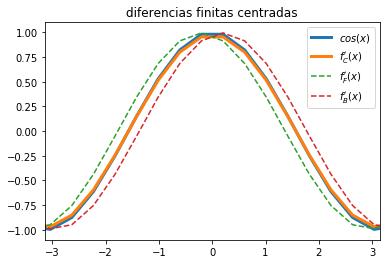

In [205]:
# graficamos a derivada, que para o caso é conhecida
# f'(x) = cos(x)
plt.plot(xm,np.cos(xm),lw=3, label=r'$cos(x)$')
# e agora a estimativa numérica 
plt.plot(xm,dfxm_cent,lw=3, label=r'$f^{\prime}_C(x)$')
plt.plot(xm,dfxm_for,linestyle='--', label=r'$f^{\prime}_F(x)$')
plt.plot(xm,dfxm_back,linestyle='--', label=r'$f^{\prime}_B(x)$')
plt.legend()
plt.ylim(-1.1,1.1)
plt.xlim(-np.pi,np.pi)
plt.title('diferencias finitas centradas')

A analise que acabamos de realizar é a base da diferenciação numérica. Para o caso a função é conhecida, mas voces encontraram muitas funções para as quais não é possível encontrar um resultado analítico. Isto porque a função, $f(x)$ é desconhecida, pode ser o resultado de medições experimentais.